<a href="https://colab.research.google.com/github/RodrigoSchneiderr/Portfolio/blob/main/Machine_Learning_Regress%C3%A3o_Linear_testando_rela%C3%A7%C3%B5es_e_prevendo_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [42]:
# Leitura dos dados.

dados = pd.read_csv('/content/Consumo_cerveja.csv', sep= ';')

In [43]:
# Visualizar os dados.

dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [44]:
# Verificando o tamanho do datast.

dados.shape

(365, 7)

Análises Preliminares

In [45]:
# Estatísticas descritivas

dados.describe().round(2)     # .round serve para arredindar os valores.

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [46]:
# Excluindo a coluna data

dados = dados.drop(['data'], axis=1)

In [47]:
# Matriz de correlação.

dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Comportamento da Variável Dependente (Y)

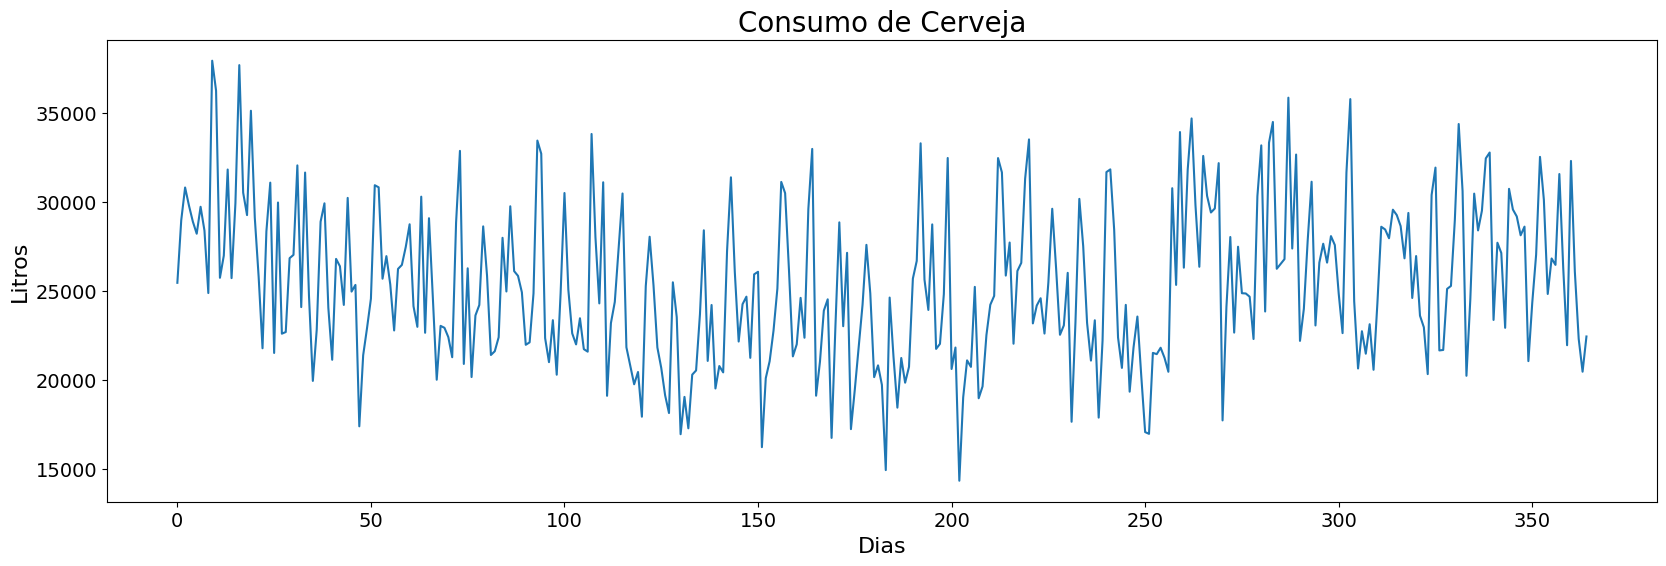

In [51]:
# Análises Gráficas
# Plotando a variável depenndente (Y).

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

Box Plot

In [52]:
import seaborn as sns

<Axes: title={'center': 'Consumo de Cerveja'}, ylabel='Litros'>

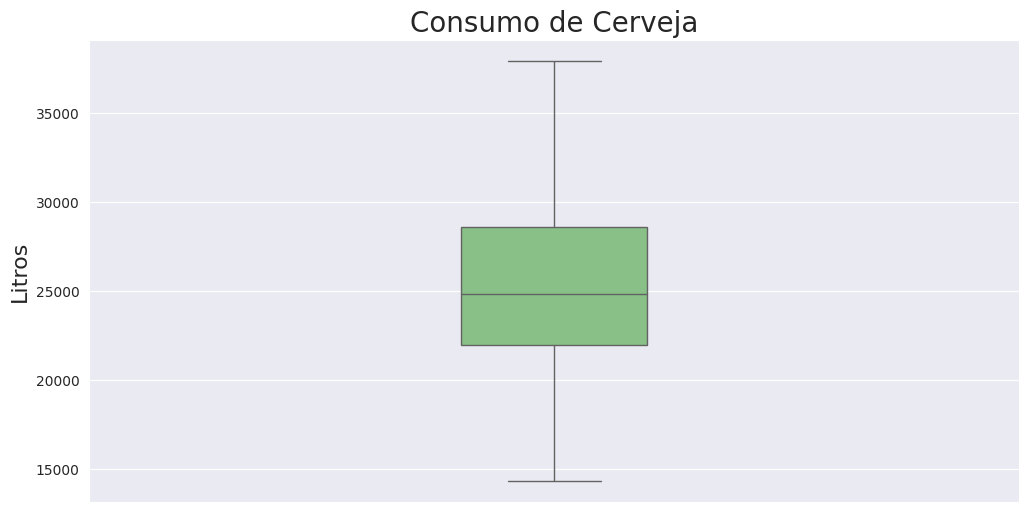

In [69]:
# Box plot da variável dependente (y)

ax = sns.boxplot(data=dados['consumo'], orient ='v', width=0.2)    # orient = 'h' horizontal e 'v' vertical.
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

Box Plot com Duas Variáveis

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

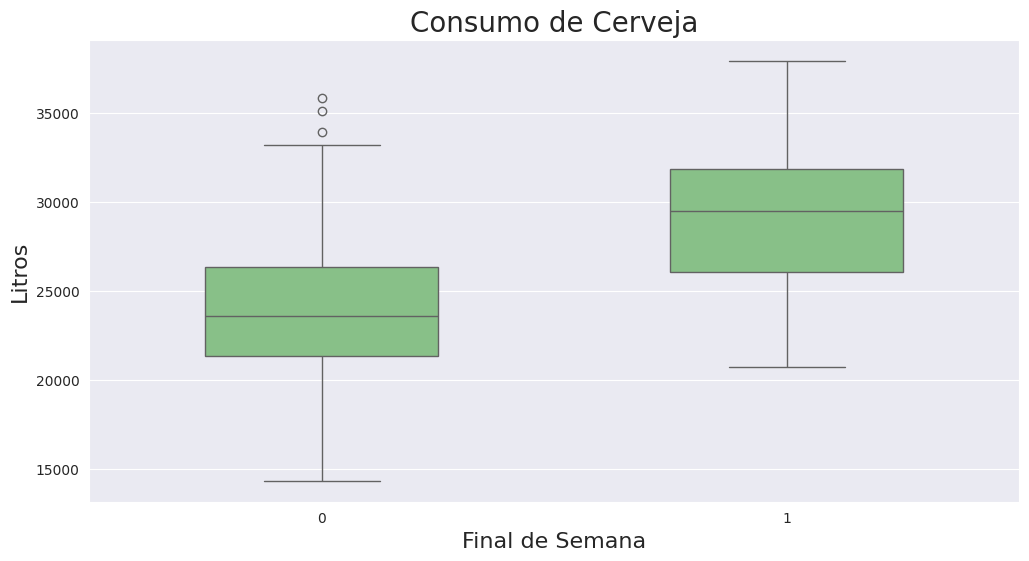

In [70]:
# Invetigando a variável dependente (y) segundo determinada característica.

ax = sns.boxplot(y= 'consumo', x='fds', data=dados, orient ='v', width=0.5)    # orient = 'h' horizontal e 'v' vertical.
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

Poemos notar no box plot acima que o consumo de cerveja aumenta nos finais de semana. Lembro que '0' são dias da semana e '1' final de semana.

In [71]:
# Alterar as configurações de visualização do box plot.

sns.set_palette('Accent')
sns.set_style('darkgrid')


<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

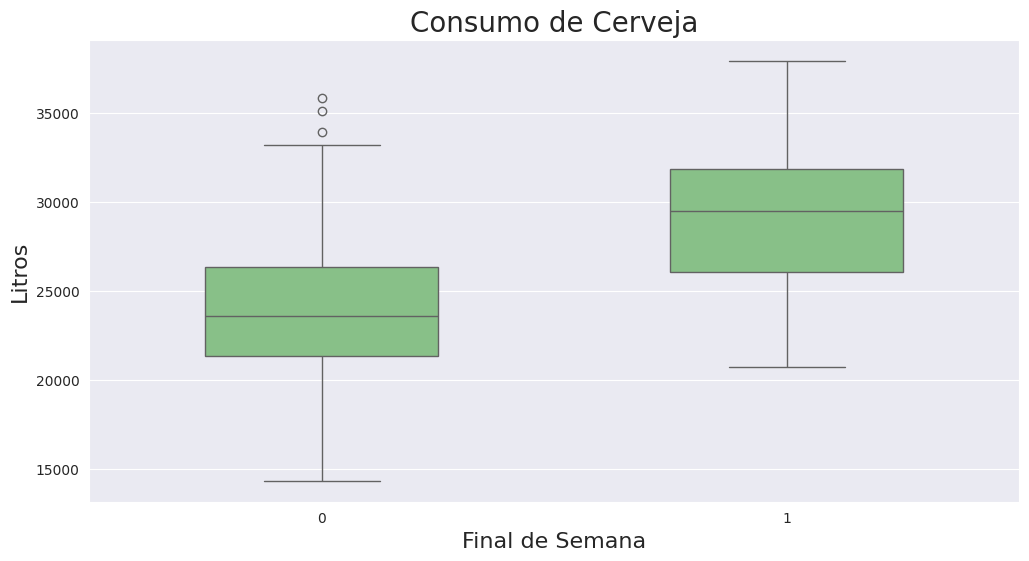

In [72]:
ax = sns.boxplot(y= 'consumo', x='fds', data=dados, orient ='v', width=0.5)    # orient = 'h' horizontal e 'v' vertical.
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

Distribuição de Frequências

<ipython-input-74-6498201161ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='consumo', ylabel='Consumo de Cerveja (Litros)'>

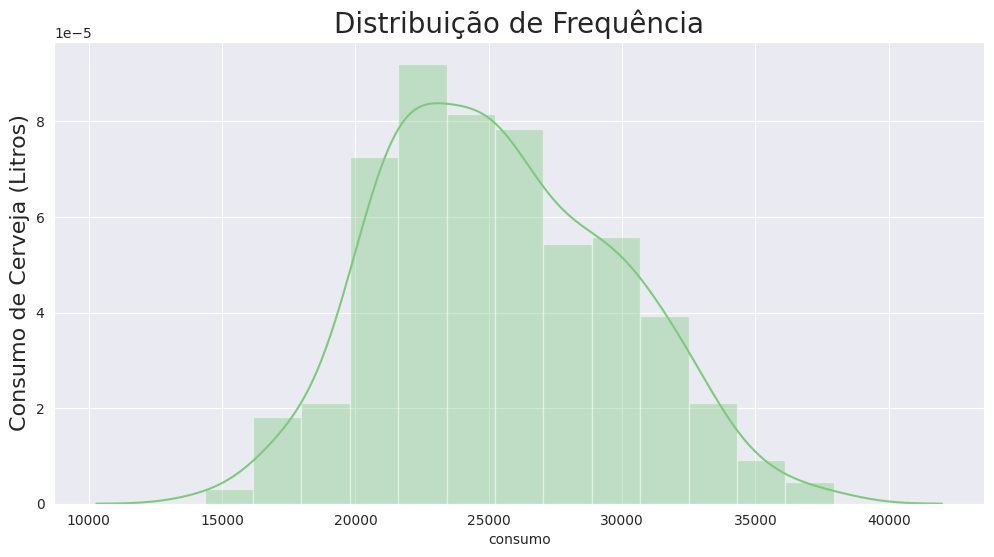

In [74]:
# Distribuição de frequências da variável dependente (Y).

ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax

Variável Dependente X Variável Explicativas (pairplot)

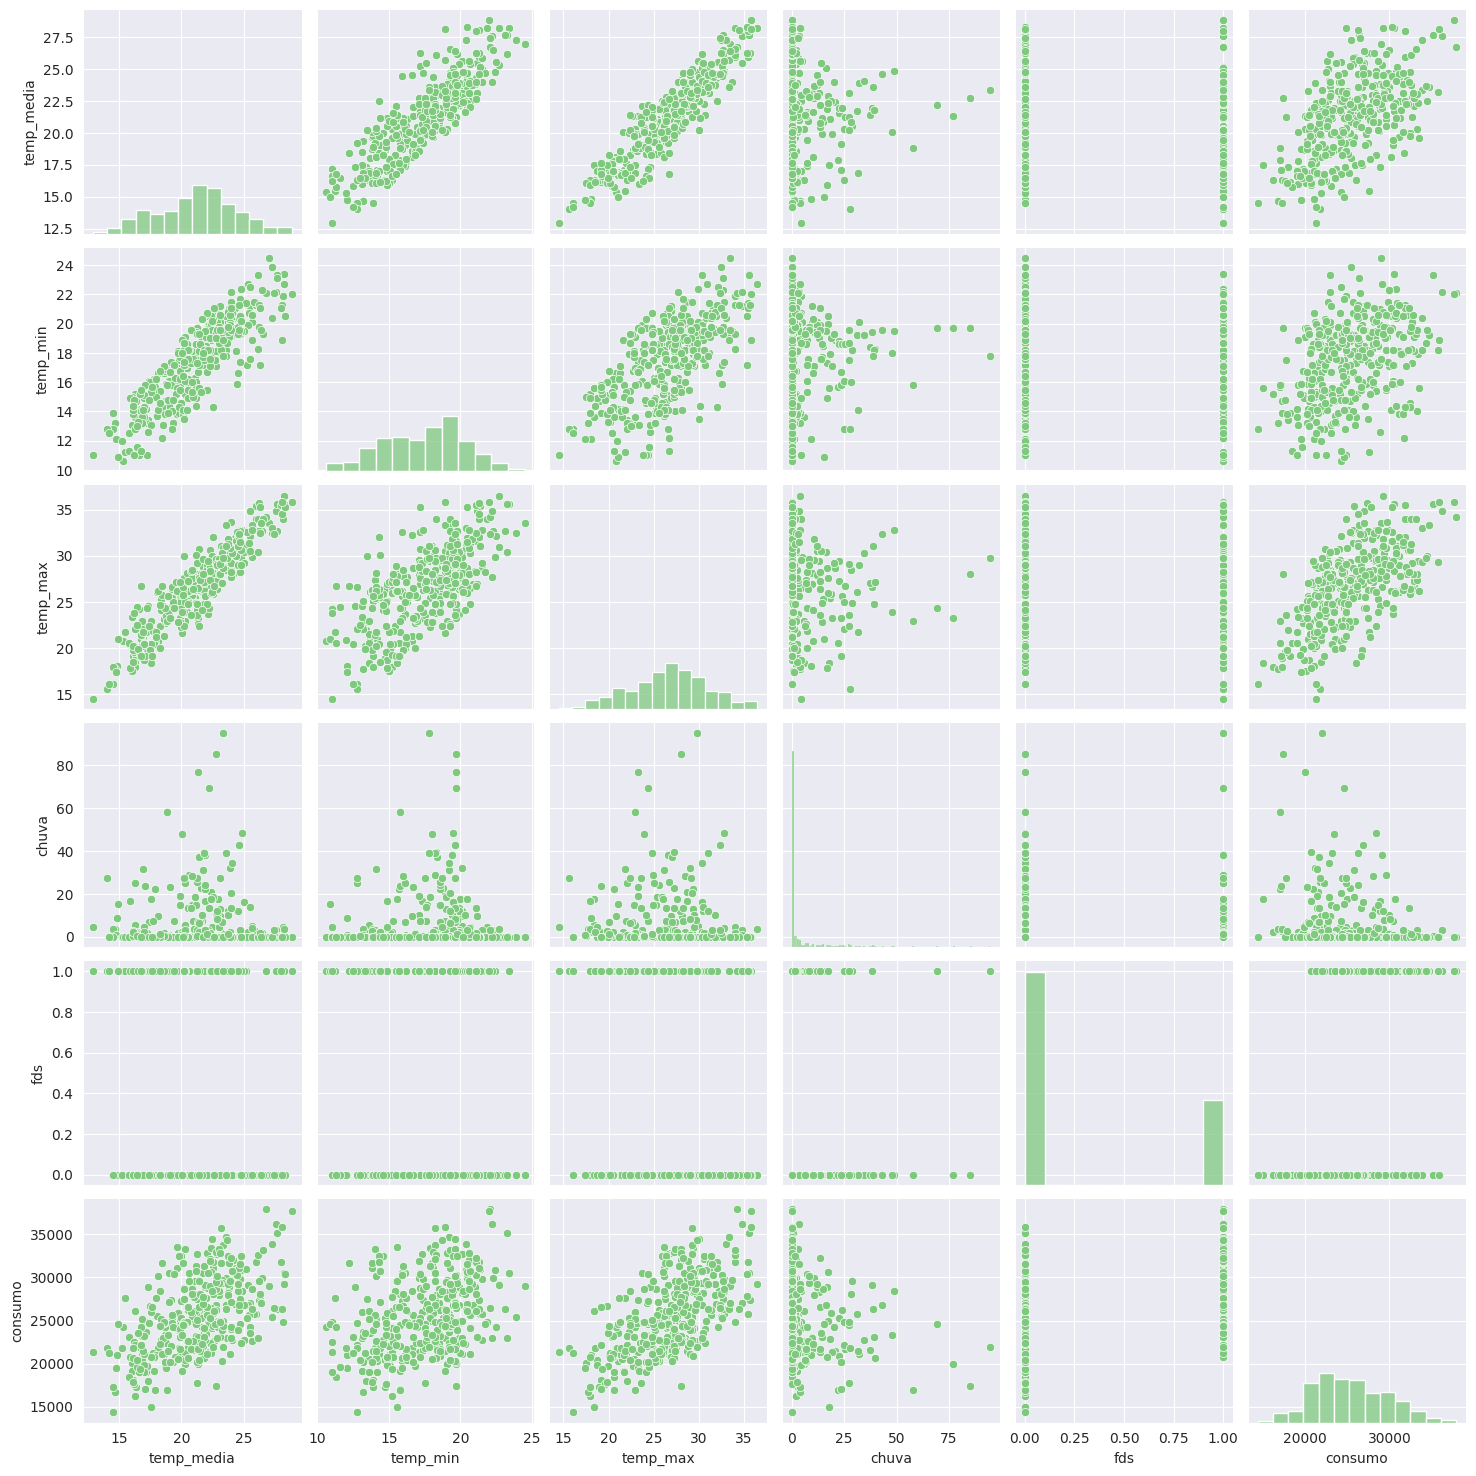

In [75]:
# Plota o relacionamento entre pares de variáveis em um dataset.

ax = sns.pairplot(dados)

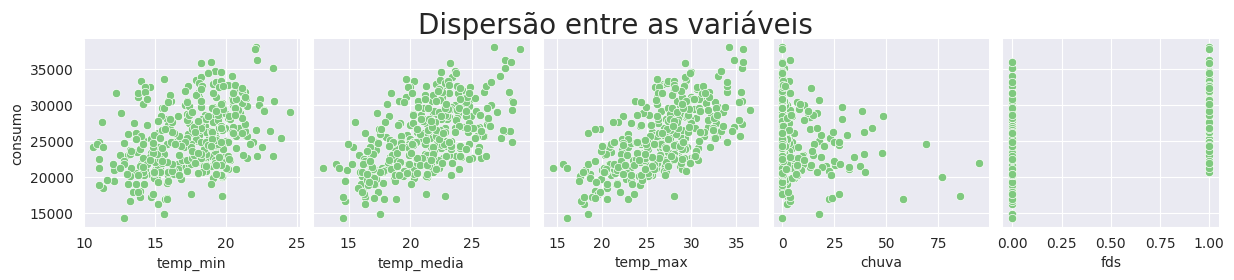

In [79]:
# Plotando o pairplot fixando somente uma variável no eixo Y.

ax = sns.pairplot(dados, y_vars=['consumo'], x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20,  y=1.08)
ax

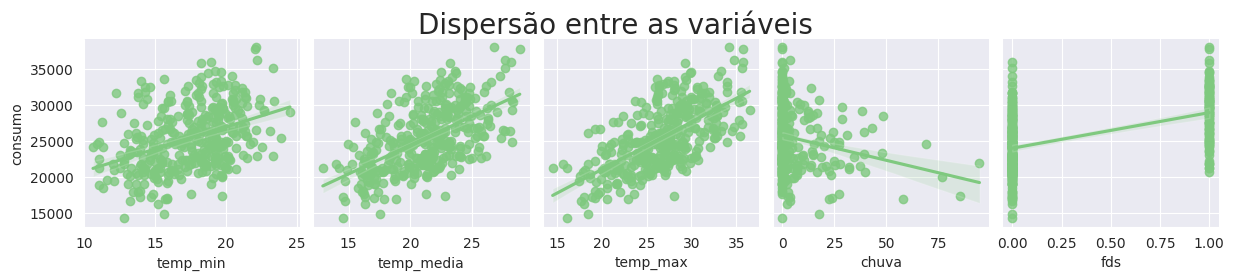

In [80]:
ax = sns.pairplot(dados, y_vars=['consumo'], x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20,  y=1.08)
ax

Com o uso de gráficos de dispersão, podemos identificar se duas variáveis apresentam uma relação linear entre elas e também a direção desta relação, como vimos acima.

Variável Dependente  X Variáveis Explicativas (jointplot)

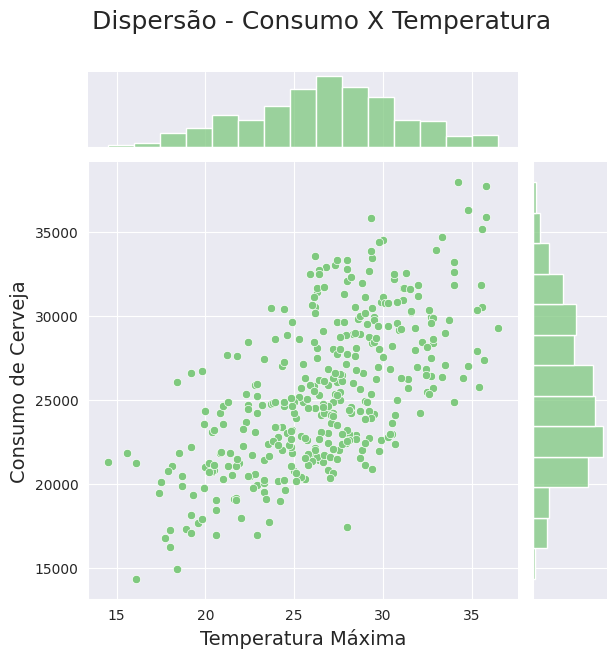

In [81]:
# Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.

ax = sns.jointplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.08)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

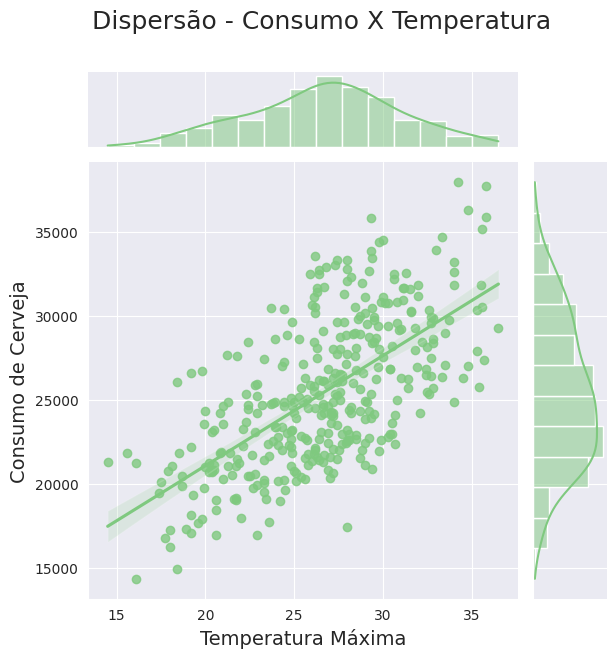

In [82]:
# Plotando um jointplot com a reta de regressão estimada.

ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.08)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

Variável Dependente X Variáveis Explicativas (Implot)

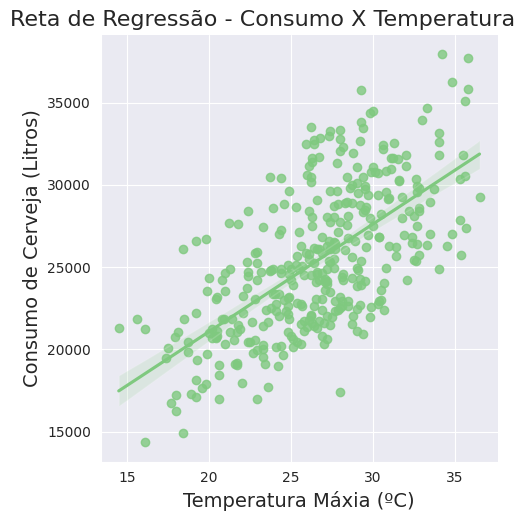

In [85]:
# Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

ax = sns.lmplot(x='temp_max', y='consumo', data = dados)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxia (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax

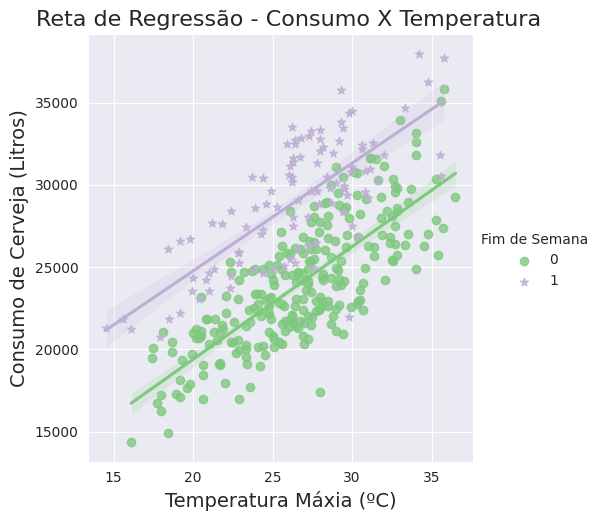

In [92]:
# Plotando um Implot utilizando uma terceira variável na análise (tipo I)

ax = sns.lmplot(x='temp_max', y='consumo', data = dados, hue = 'fds', markers=['o', '*'], legend = False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxia (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

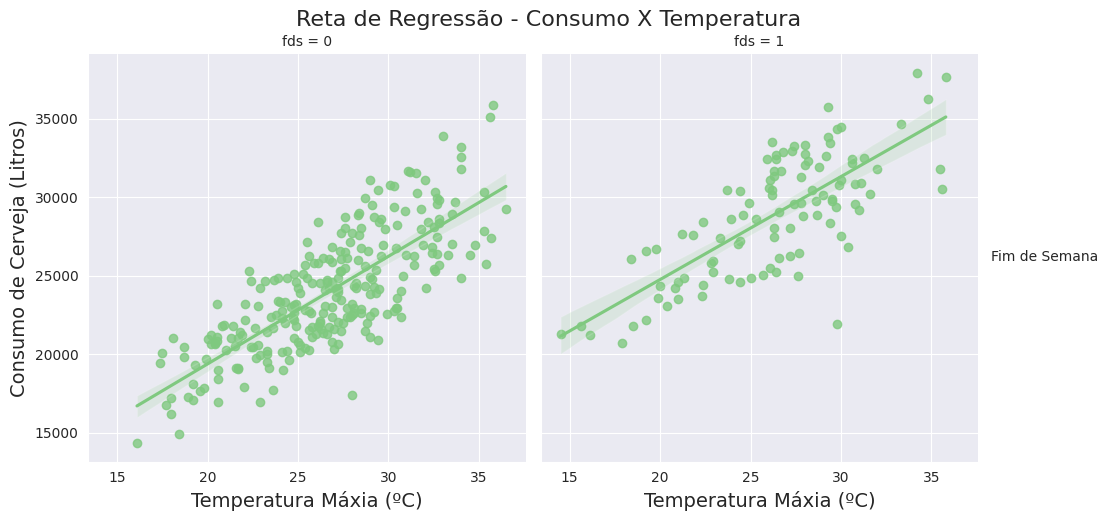

In [93]:
# Plotando um Implot utilizando uma terceira variável na análise (tipo II)

ax = sns.lmplot(x='temp_max', y='consumo', data = dados, col = 'fds')
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxia (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax.add_legend(title='Fim de Semana')
ax

Estimando um Modelo de Regressão Linear para o Consumo

Regressão Linear

In [96]:
# Importando o train_test_split da biblioteca scikit-learn.

from sklearn.model_selection import train_test_split

In [97]:
# Criando uma Series (pandas) para armazenar o Consumo de Cerveja (Y).

y = dados['consumo']

In [98]:
# Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X).

X = dados[['temp_max', 'chuva', 'fds']]

In [99]:
# Criando os datasets de treino e de teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)


In [101]:
# Verificando os tamanhos dos arquivos gerados pela função train_test_split.

X_train.shape

(255, 3)

In [102]:
X_test.shape

(110, 3)

In [103]:
X_train.shape[0] + X_test.shape[0]

365

In [104]:
X.shape[0] * 0.3

109.5

In [105]:
X.shape[0] * 0.7

255.49999999999997

In [108]:
# Importando LinearRegression e metrics da biblioteca scikit-learn.

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [109]:
# Instanciando a classe LinearRegression().

modelo = LinearRegression()

In [110]:
# Utilizando o método fit() do objeto 'modelo' para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train).

modelo.fit(X_train, y_train)

LinearRegression()

In [111]:
# Obtendo o coeficiente de determinação do modelo estimado com os dados de TREINO.
# Coeficiente de Determinação - R².
# O coeficiente de determinação é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1.

print('R² = {}'.format(modelo.score(X_train, y_train). round(2)))

R² = 0.73


In [112]:
# Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto 'modelo.

y_previsto = modelo.predict(X_test)

In [113]:
# Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo.
# Lembre-se que o R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Obtendo Previsões Pontuais

In [115]:
# Dados de entrada.

entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [117]:
# Gerando previsão pontual.

modelo.predict(entrada)[0]

26094.901775262017

Conforme vimos a cima a nossa previsão de que com a temperatura máxima de 30.5ºC, com chuva de 12.2mm e que não é um final de semana, o consumo médio estimado de cerveja será de 26 mil litros.

In [121]:
# Criando um simulador simples.

temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpretação dos Coeficientes Estimados

In [122]:
# Obtendo o intercepto do modelo.

modelo.intercept_


5951.976339312445

Independente das outras variáveis o consumo médio de cerveja é de 5.951 litros de cerveja.
De forma mais simples, o intercepto representa o efeito médio em Y (consumo de cerveja), quando X2 (temperatura máxima), x3 (chuva) e x4 (final de semana)são iguais a zero.

In [123]:
type(modelo.intercept_)

numpy.float64

In [124]:
# Obtendo os coeficientes de regressão.

modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [125]:
type(modelo.coef_)

numpy.ndarray

In [126]:
# Confirmando a ordem das variáveis explicativas no DataFrame.

X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [127]:
# Criando lista com os nomesdas variáveis do modelo.

index=['Intercepto', 'Temperatura Maxima', 'Chuva (mm)', 'Final de Semana']

In [129]:
# Criando um DataFrame para armazenar os coeficientes do modelo.

pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index = index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Maxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


Interpretação dos Coeficientes Estimados:

- Intercepto: Excluindo o efeito das variáveis explicativas (X2 = X3 = X4 = 0) o efeito médio no Consumo de Cerveja seria de 5951,98 litros.

- Temperatura Máxima (ºC): Mantendo-se os valores de X3 (chuva) e X4 (Final de Semana) constantes, o acréscimo de 1ºC na Temperatura Máxima, gera uma variação média no Consumo de Cerveja de 684,74 litros.

- Chuva (mm): Mantendo-se os valores X2 (Temperatura Máxima) e X4 (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de -60,78 litros.

- Final de Semana (Sim/Não): Mantendo-se os valores de X2 (Temperatura Máxima) e X3 (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de 5401,08 litros.

Análises Gráficas das Previsões do Modelo

In [130]:
# Gerando as previsões do modelo para os dados de TREINO.

y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Consumo de Cerveja (Litros) - Real'>

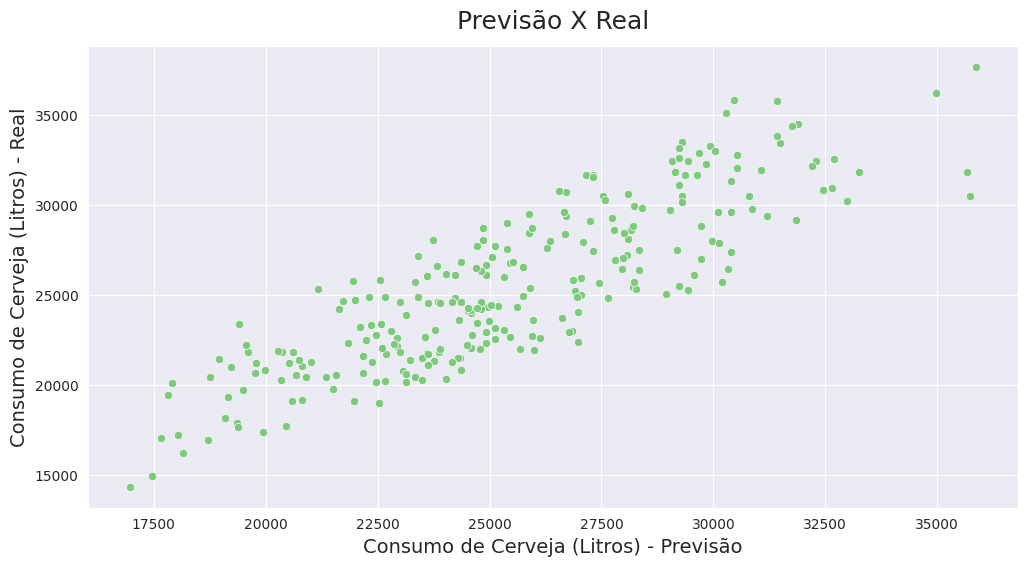

In [132]:
# Gráfico de dispersão entre valor estimado e valor real.

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18, y=1.02)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros) - Real', fontsize=14)
ax

In [134]:
# Obtendo os resíduos.

residuo = y_train - y_previsto_train
residuo

,consumo
195,3891.289113
344,4040.499863
288,-3010.078635
59,-1704.289133
220,4223.837237
...,...
73,3186.229912
68,-739.805532
215,3010.236465
341,2588.394409


<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Resíduos'>

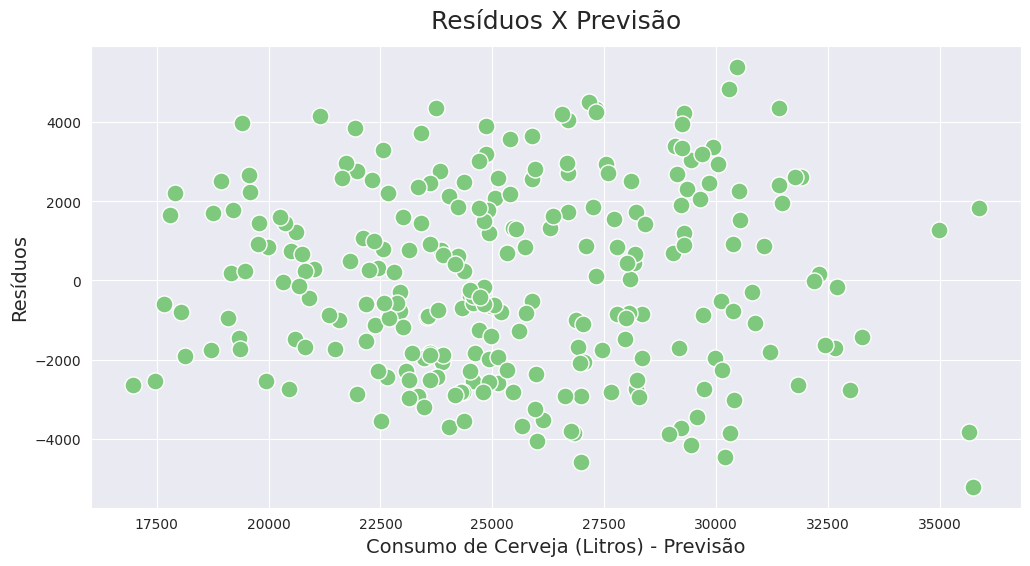

In [136]:
# Gráfico de dispersão entre valor estimado e resíduos.
# Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade).
# Os resíduos precisam ter uma variação constante.

ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos X Previsão', fontsize=18, y=1.02)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Comportamento que era esperado no gráfico acima seria uma variação dos resíduos entre 4000 e -4000. Notamos que essa variação aumenta conforme o consumo de cerveja.

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Resíduos²'>

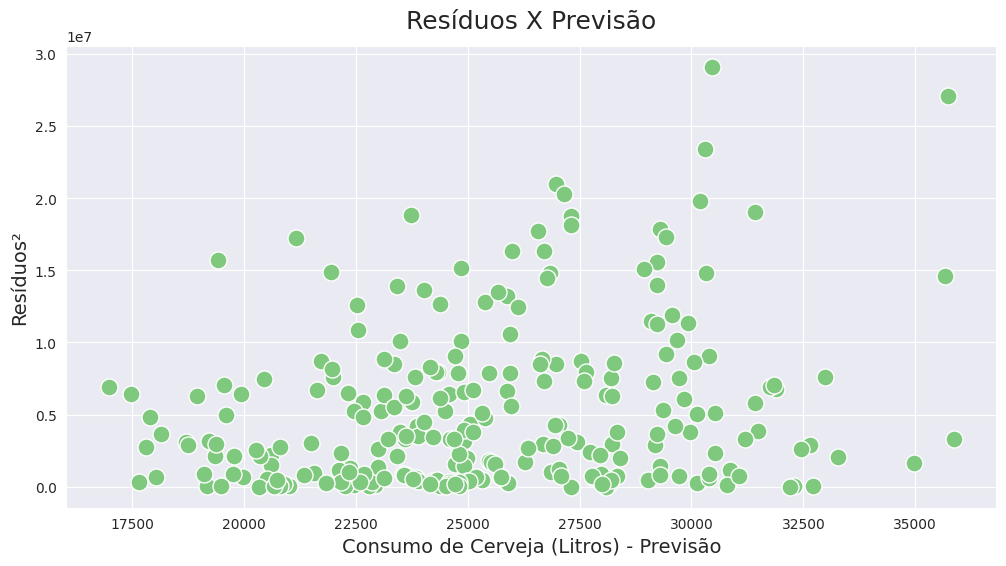

In [138]:
# Utilizando os resíduos ao quadrado.

ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos X Previsão', fontsize=18, y=1.02)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<ipython-input-141-767427470d37>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (Litros) - Previsão', ylabel='Resíduos²'>

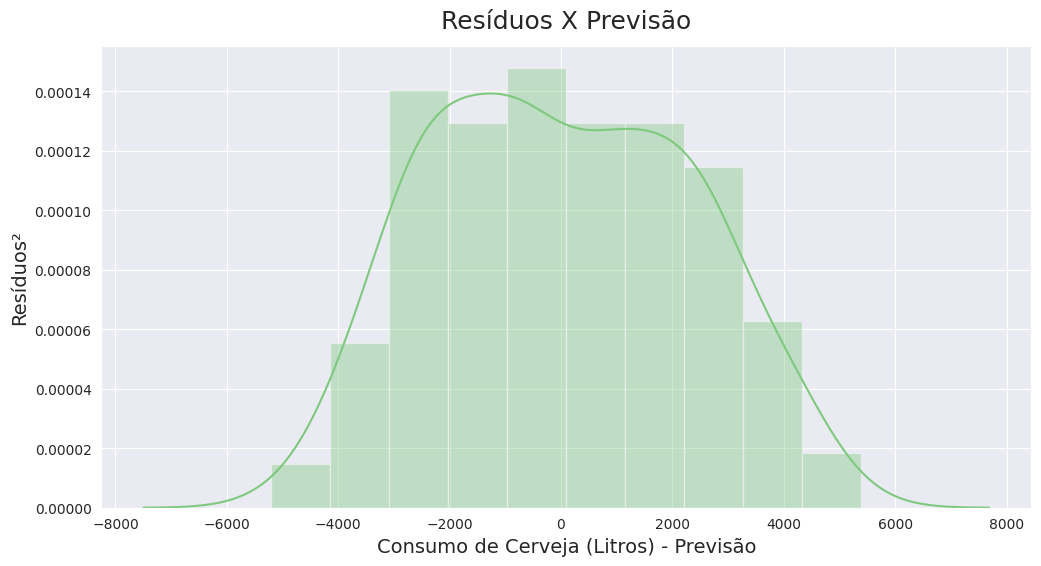

In [141]:
# Plotando a distribuição de frequências dos resíduos.

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos X Previsão', fontsize=18, y=1.02)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

Comparando Modelos

In [142]:
# Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatura Média.

X2 = dados[['temp_media', 'chuva', 'fds']]

In [143]:
# Criando os datasts de treino e de teste.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [144]:
# Instanciando a classe LinearRegression().

modelo_2 = LinearRegression()

In [146]:
# Utilizando o método fit() do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train).

modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [147]:
# Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior.
print('Modelo com temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train). round(2)))

Modelo com temp. Média
R² = 0.66


In [148]:
print('Modelo com temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train). round(2)))

Modelo com temp. Máxima
R² = 0.73


In [152]:
# Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método predict() dos objetos 'modelo' e 'modelo_2'.

y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [153]:
# Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos.

print('Modelo com temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2). round(2)))

Modelo com temp. Máxima
R² = 0.66


In [154]:
print('Modelo com temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto). round(2)))

Modelo com temp. Máxima
R² = 0.69


Outras Métricas de Regressão

In [156]:
# Métricas de Regressão.
# Erro Quadrático Médio e Raiz do Erro Quadrático Médio.
# Obtendo métricas para o modelo com Temperatura Média.

EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])


,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [157]:
# Obtendo métricas para o modelo com Temperatura Máxima.

EQM = metrics.mean_squared_error(y2_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


R² = sempre tentar maximizar, deixar perto de 1.
EQM e REQM = sempre tentar minimizar, perto de 0. Quanto menor, menos erro temos de previsão.

Salvando e Carregando o Modelo Estimado

In [158]:
# Dados de entrada.

X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [160]:
entrada = X_test[0:1]

In [161]:
# Gerando previsão pontual.

modelo.predict(entrada)[0]

26094.901775262017

In [162]:
# Criando um simulador simples.

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))


26094.90 litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [163]:
# Salvando o modelo estimado.

import pickle

In [164]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()